# MOVIE RATING PREDICTION WITH PYTHON

### Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Try reading the first few lines of the CSV to debug
try:
    # Read the first few lines of the CSV file
    sample_data = pd.read_csv(file_path, nrows=5, encoding='utf-8')
    print(sample_data)
except UnicodeDecodeError:
    # If there's an encoding issue, try a different encoding
    sample_data = pd.read_csv(file_path, nrows=5, encoding='ISO-8859-1')
    print(sample_data)

# Read the full CSV with the appropriate encoding
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Data Preprocessing

In [43]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (if any)
data = data.dropna()

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])
data['Director'] = label_encoder.fit_transform(data['Director'])
data['Actor 1'] = label_encoder.fit_transform(data['Actor 1'])



Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


# Exploratory Data Analysis

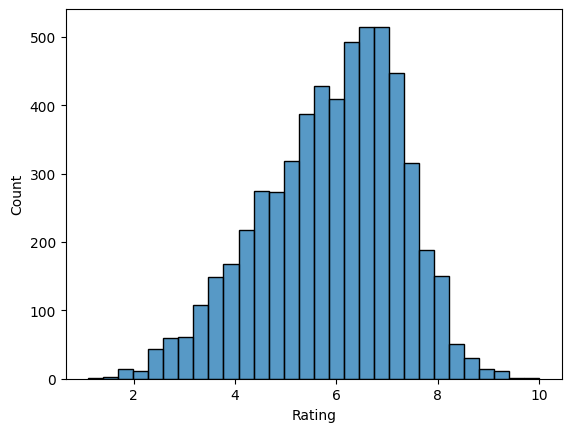

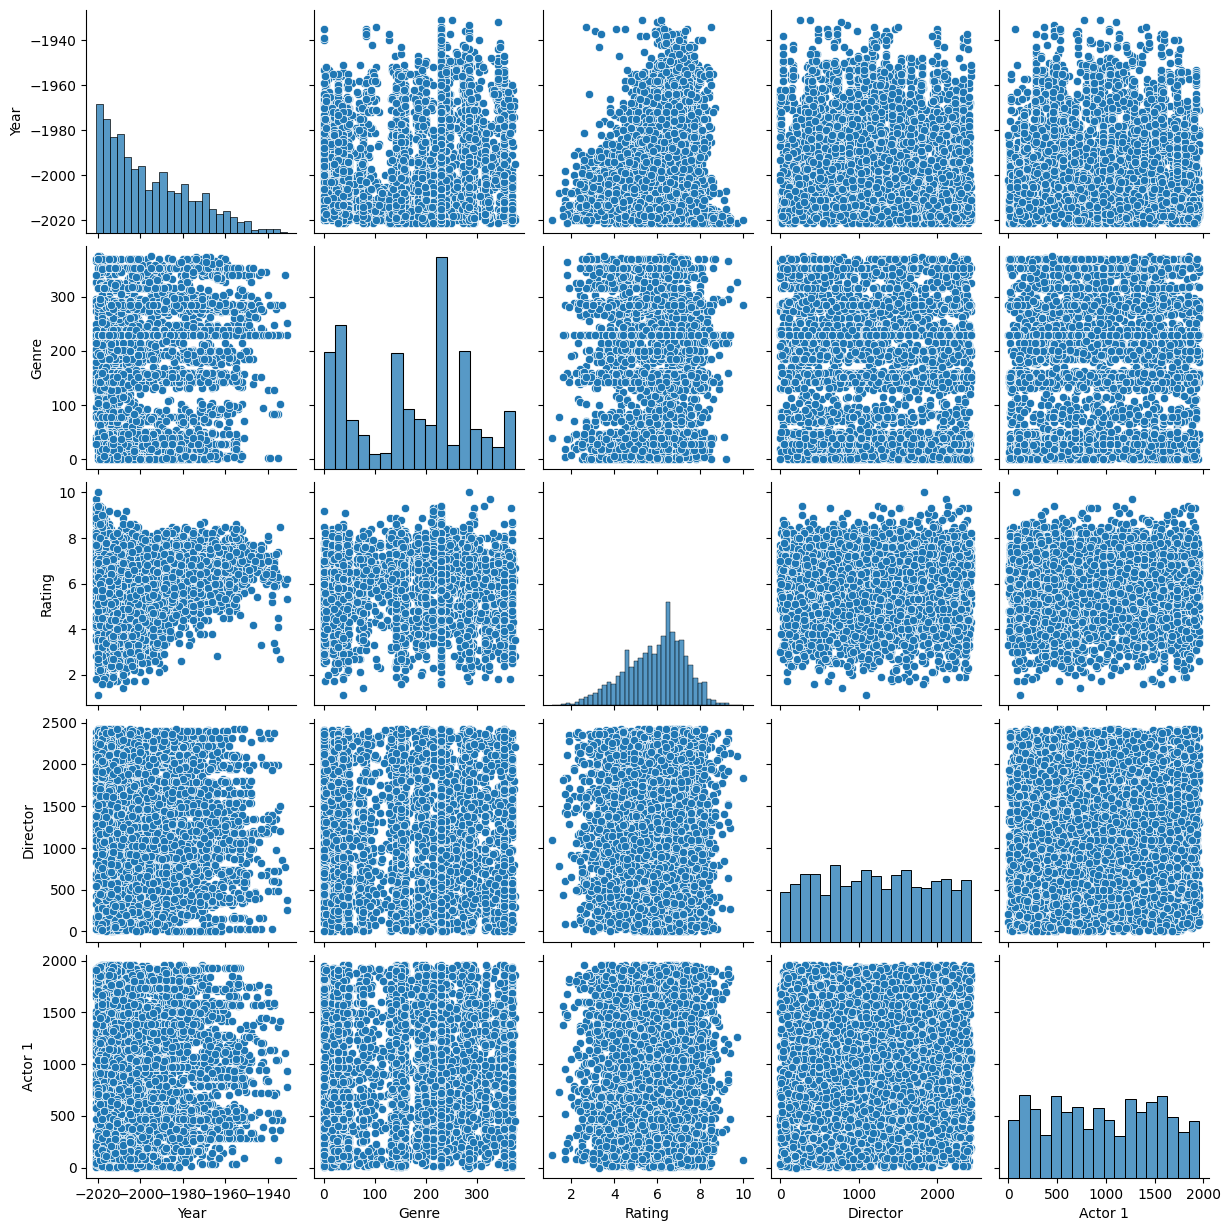

In [46]:
# Visualize the distribution of ratings
sns.histplot(data['Rating'], bins=30)
plt.show()

# Visualize the relationship between features and rating
sns.pairplot(data)
plt.show()



# Model Builidng

In [ ]:
# Ensure all columns are numeric
X = data.drop('Rating', axis=1)
y = data['Rating']

# Check data types
print(X.dtypes)

# Handle non-numeric columns (if any)
# For example, you can use one-hot encoding for categorical variables
X = pd.get_dummies(X)

# Check for missing values
print(X.isnull().sum())
print(y.isnull().sum())

# Fill missing values or drop rows/columns with missing values
X = X.fillna(X.mean())  # or you can use other strategies like X.fillna(0)
y = y.fillna(y.mean())  # if y has missing values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)





In [ ]:
# Step 6: Model Evaluation
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Step 7: Prediction and Visualization
# Visualize the actual vs predicted ratings
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show(
